<a href="https://colab.research.google.com/github/MONTIELIVAN/ShamanTools/blob/main/TRABAJO_METODOS_NUMERICOS_(IVAN_MONTIEL_BRINA_ESPITIA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

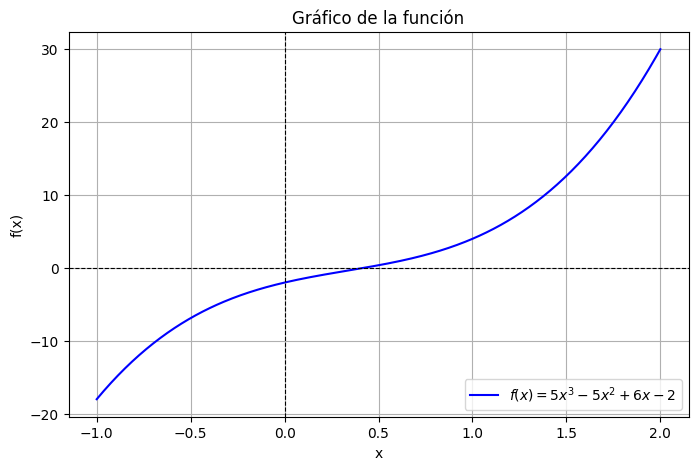

Iteración | a       | b       | c       | f(c)      | Error
------------------------------------------------------------
        1 | 0.000000 | 0.500000 | 0.500000 | 0.375000 | 1.000000
        2 | 0.250000 | 0.500000 | 0.250000 | -0.734375 | 1.000000
        3 | 0.375000 | 0.500000 | 0.375000 | -0.189453 | 0.333333
        4 | 0.375000 | 0.437500 | 0.437500 | 0.086670 | 0.142857
        5 | 0.406250 | 0.437500 | 0.406250 | -0.052460 | 0.076923
Raíz estimada: 0.40625 con 5 iteraciones


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 5*x**3 - 5*x**2 + 6*x - 2

# 1. Graficar la función
gx = np.linspace(-1, 2, 400)
gy = f(gx)

plt.figure(figsize=(8,5))
plt.plot(gx, gy, label='$f(x) = 5x^3 - 5x^2 + 6x - 2$', color='b')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.title('Gráfico de la función')
plt.show()

# 2. Método de Bisección
def biseccion(a, b, tol):
    if f(a) * f(b) > 0:
        print("El método de bisección no es aplicable en este intervalo.")
        return None

    iteraciones = 0
    error = float('inf')

    print("Iteración | a       | b       | c       | f(c)      | Error")
    print("-" * 60)

    while error > tol:
        c = (a + b) / 2  # Punto medio
        iteraciones += 1

        if f(c) == 0:
            break

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        error = abs(b - a) / abs(c)
        print(f"{iteraciones:9} | {a:.6f} | {b:.6f} | {c:.6f} | {f(c):.6f} | {error:.6f}")

    return c, iteraciones

# Parámetros iniciales
a, b = 0, 1
tolerancia = 0.1  # 10%

raiz, iters = biseccion(a, b, tolerancia)
print(f"Raíz estimada: {raiz} con {iters} iteraciones")


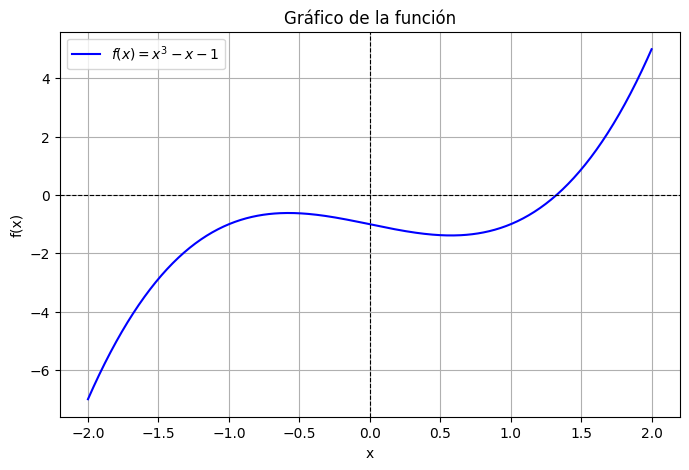


Iteraciones del Método de Bisección:
Iteración 1: a=1.00000, b=2.00000, c=1.50000, f(c)=0.87500
Iteración 2: a=1.00000, b=1.50000, c=1.25000, f(c)=-0.29688
Iteración 3: a=1.25000, b=1.50000, c=1.37500, f(c)=0.22461
Iteración 4: a=1.25000, b=1.37500, c=1.31250, f(c)=-0.05151
Iteración 5: a=1.31250, b=1.37500, c=1.34375, f(c)=0.08261
Iteración 6: a=1.31250, b=1.34375, c=1.32812, f(c)=0.01458
Iteración 7: a=1.31250, b=1.32812, c=1.32031, f(c)=-0.01871

Raíz estimada con Bisección: 1.32031 en 7 iteraciones

Iteraciones del Método de Newton-Raphson:
Iteración 1: x=1.00000, f(x)=-1.00000, f'(x)=2.00000, x_new=1.50000
Iteración 2: x=1.50000, f(x)=0.87500, f'(x)=5.75000, x_new=1.34783
Iteración 3: x=1.34783, f(x)=0.10068, f'(x)=4.44991, x_new=1.32520
Iteración 4: x=1.32520, f(x)=0.00206, f'(x)=4.26847, x_new=1.32472

Raíz estimada con Newton-Raphson: 1.32472 en 4 iteraciones


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 1

def df(x):
    return 3*x**2 - 1

# 1. Graficar la función
gx = np.linspace(-2, 2, 400)
gy = f(gx)

plt.figure(figsize=(8,5))
plt.plot(gx, gy, label='$f(x) = x^3 - x - 1$', color='b')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.title('Gráfico de la función')
plt.show()

# 2. Método de Bisección
def biseccion(a, b, tol):
    if f(a) * f(b) > 0:
        print("El método de bisección no es aplicable en este intervalo.")
        return None, 0

    iteraciones = 0
    error = float('inf')

    print("\nIteraciones del Método de Bisección:")
    while error > tol:
        c = (a + b) / 2
        iteraciones += 1

        print(f"Iteración {iteraciones}: a={a:.5f}, b={b:.5f}, c={c:.5f}, f(c)={f(c):.5f}")

        if f(c) == 0:
            break

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        error = abs(b - a) / abs(c)

    return c, iteraciones

# 3. Método de Newton-Raphson
def newton_raphson(x0, tol, max_iter=100):
    x = x0
    print("\nIteraciones del Método de Newton-Raphson:")
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if dfx == 0:
            print("Derivada cero, no se puede continuar.")
            return None, i+1

        x_new = x - fx / dfx
        print(f"Iteración {i+1}: x={x:.5f}, f(x)={fx:.5f}, f'(x)={dfx:.5f}, x_new={x_new:.5f}")

        if abs(x_new - x) < tol:
            return x_new, i+1

        x = x_new

    return x, max_iter

# Parámetros iniciales
a, b = 1, 2  # Intervalo para bisección
tolerancia = 0.01  # 1%

raiz_biseccion, iters_biseccion = biseccion(a, b, tolerancia)
print(f"\nRaíz estimada con Bisección: {raiz_biseccion:.5f} en {iters_biseccion} iteraciones")

# Newton-Raphson con x0 = 1
x0 = 1
raiz_newton, iters_newton = newton_raphson(x0, tolerancia)
print(f"\nRaíz estimada con Newton-Raphson: {raiz_newton:.5f} en {iters_newton} iteraciones")
